In [3]:
import os

# Obtenir le répertoire de travail actuel
project_directory = os.getcwd()

print("Répertoire du projet : ", project_directory)

# on'a pose la problematik on verra comment arriver a un modele et apres on verra comment le deployer

#on va travailler avec la BD de train et pas de test pour le moment

Répertoire du projet :  C:\Users\DAVID TANKEU\Credit Logement Bancaire


In [11]:
# importation des packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix # celle ci permet d'evaluer notre modele
import pickle  # ce package est utilise pour stoker notre modele
from sklearn.preprocessing import LabelEncoder


In [13]:
#je vais donc importer ma base de donne
# explikez chak colone dans sa video
#selfemploye(eskil a son propre business)
#ApplicantIncome(salaire de selui ki demande de credit)
#CoapplicantIncome(partenaire de celui i demande le credit femme ou mari)
#LoanAmount(montant de credit demande)
#Loan_Amount_Term(nombre de mois pour le credit)
#Credit_History(historique du crdit)
#Property_Area(ou la personne vit si cen urban ou en rural)
data_frame_credit = pd.read_csv('D:\\MES FICHIERS\\BD Credit Logement\\train.csv')
data_frame_credit

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [23]:
pd.set_option('display.max_rows' , data_frame_credit.shape[0] +1 )
data_frame_credit

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.000000,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.000000,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.000000,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.000000,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.000000,349.0,360.0,1.0,Semiurban,N


In [9]:
#realisons une copy de notre bd cela permit de faire une copie et de relaiser notre travail sur l'autre BD

# ca nous permet egalement d'avoir 2 BD une BD originale et une BD nettoye

df_credit_copy = data_frame_credit.copy()
df_credit_copy

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [39]:
print("Le nombre de doublons dans mon dataFrame est " ,data_frame_credit.duplicated())

Le nombre de doublons dans mon dataFrame est  0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool


In [11]:
#examinons le type de colone de notre BD
#ici on voit ke Gender est de type Object, loanAmount est de type float

# et savoir que Object est de type categorique donc il faut toujours faire cette verification et float est de type numerique

# si par exemple je trouve pour le salaire que c de type object c par correct car le salaire doit etre de type entier ou reel

#apres examin on trouve que le type de colonne est bon
data_frame_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
#voyons la taille de notre BD

#ici la BD contit 13 colone et 614 lignes

print("Dimension de notre dataFrame : " , data_frame_credit.shape)

Dimension de notre dataFrame :  (614, 13)


In [13]:
# ici on'aura les valeurs statisitues uniquement sur lkes variables numeriques

data_frame_credit.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [14]:
# ici on'aura les valeurs statisitues uniquement sur toutes les  variables numeriques et categorielles 

data_frame_credit.describe(include = "all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [15]:
#verifions maintenant les valeurs manquantes

# ici on voit que dans Gender on'a 13 valeurs manquantes ce qui n'est pas enorme par rapport a 614
#Married on'a 3 valeurs manquantes ce n'est pas enorme par rapport a 614
#loanAmount on'a 22 valeurs manquantes ce n'est pas enorme par rapport a 614

# si on trouve peut etre une colone avec 300 valeurs manquantes on verra comment la supprimer

data_frame_credit.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
#pour supprimer les valeurs manquantes on doit:
#pour les variables categoriques on va les remplacer par le mode
#pour les variables numeriques on va les remplacer par la mediane

# je vous ferai un cours sur les statistiques a utilise en data scientist

# avant de faire ca je dois connaitre les variables numerique et les variables categoriques pour les connaitre

data_frame_credit.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [17]:
data_frame_credit = data_frame_credit.rename(columns={'Semiurban': 'Semiurban2'})

In [18]:
# pour le fairer je vais donc creer deux liste
# je ne vais pas travailler avec Loan_ID car ca represente le numero de dossier de chak client et on ne travaille par avec les ID en data scientist

variables_numeriques = ['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
variables_categoriques = ['Credit_History','Gender', 'Married', 'Dependents', 'Education','Self_Employed','Loan_Status','Property_Area' ]

print('Les variables numeriques sont:',variables_numeriques)
print('Les variables categoriques sont:',variables_categoriques)

Les variables numeriques sont: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Les variables categoriques sont: ['Credit_History', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Status', 'Property_Area']


In [ ]:
#la methode fillna permet de remplir les valuers manquantes

In [19]:
#supprimon les valeurs manquantes cote variables categoriques
# imnplace = true car on veut faire ce remplacement dans la memoire dans la BD car si on ne met pas ce inplace il va 
# bien afficher la valeur manquante renseigne mais il ne l'enregistrera pas dans la BD

# la on met [0] car il y'a les cas ou on peut avoir deux modes

data_frame_credit['Gender'].fillna(data_frame_credit['Gender'].mode()[0],inplace=True)
data_frame_credit['Self_Employed'].fillna(data_frame_credit['Self_Employed'].mode()[0],inplace=True)
data_frame_credit['Married'].fillna(data_frame_credit['Married'].mode()[0],inplace=True)
data_frame_credit['Dependents'].fillna(data_frame_credit['Dependents'].mode()[0],inplace=True)
data_frame_credit['Credit_History'].fillna(data_frame_credit['Credit_History'].mode()[0],inplace=True)

# ici je veux remplacer les valeurs manquantes dans la colone Gender par le mode de la colone Gender
# donc la on prendra uniquement la 1ere valeur



C:\Users\DAVID TANKEU\AppData\Local\Temp\ipykernel_3528\1214336455.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_frame_credit['Gender'].fillna(data_frame_credit['Gender'].mode()[0],inplace=True)
C:\Users\DAVID TANKEU\AppData\Local\Temp\ipykernel_3528\1214336455.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are

In [20]:
#je vous montre pkoi j'ai pris l'indice 0 donc la il prend uniquement Male

data_frame_credit['Gender'].mode()[0]

'Male'

In [21]:
#supprimon les valeurs manquantes cote variables numeriques
#la on ne mettra plus [O] car on'a une seule mediane
#inplace=True es tjr pour remplacer dans la BD

#les valeurs manquantes sont remlaces par la mediane

data_frame_credit['LoanAmount'].fillna(data_frame_credit['LoanAmount'].median(),inplace=True)
data_frame_credit['Loan_Amount_Term'].fillna(data_frame_credit['Loan_Amount_Term'].median(),inplace=True)

C:\Users\DAVID TANKEU\AppData\Local\Temp\ipykernel_3528\3698061445.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_frame_credit['LoanAmount'].fillna(data_frame_credit['LoanAmount'].median(),inplace=True)
C:\Users\DAVID TANKEU\AppData\Local\Temp\ipykernel_3528\3698061445.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which

In [22]:
#verifions maintenant si on'a encore les valeurs manquantes dans notre BD

#la maintenant on voit kon'a plus de valeurs manquantes

data_frame_credit.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# Passons a l'analyse Univariee on prendra Variable par Variable et on va les etudier

# ici on 'aura une variables Target ou encore variable de sortie  ou variables cible et ici ca sera Loan'status qu sera pour savoir si le credit a ete accorde ou pas

# donc Loarn status est une variable dependante car elle depend de toutes les autres variables et les autres variables de notre BD sont independantes

In [23]:
# voyons donc le nombre de credit valide et le nombre de credit non accorde dans notre variable target

# ici on voit kon 'a 422 credit accorde et 192 credit non accorde'

data_frame_credit['Loan_Status'].value_counts()


Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [24]:
# essayons d'etudier notre variable univarie target de pret

# voyons cela en pourcentage

# normalize veut dire ke je met le tout entre 0 et 1 et je multiplie par 100 pour donner un pourcentage

# donc la on'a 68 pourcent de credit accorde et 31 pourcent de credit non accorde

data_frame_credit['Loan_Status'].value_counts(normalize=True)*100

Loan_Status
Y    68.729642
N    31.270358
Name: proportion, dtype: float64

<Axes: title={'center': 'Credit accorde ou pas'}, xlabel='Loan_Status'>

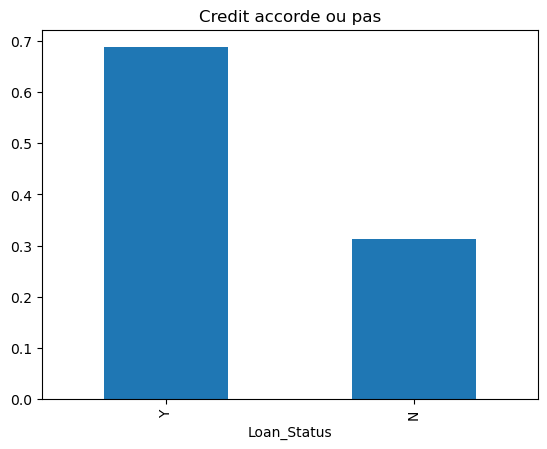

In [26]:
# essayons un peu de visulaiser notre variable target
data_frame_credit['Loan_Status'].value_counts(normalize=True).plot.bar(title='Credit accorde ou pas')

In [ ]:
#l'analyse univarie c'est variables par variables apres on fera l'analyse bivarrie pour preparer notre BD pour le modele de machine Learning

In [25]:
data_frame_credit['Gender'].value_counts()

# la on'a 502 hoes et 112 femmes

# si on'avait par exemple Male avec m minisucule il devrait egalement compter et les renvoyer bref il est sensible a la casse

# donc la on'a seulement deux valeurs soit Male soit Female

Gender
Male      502
Female    112
Name: count, dtype: int64

In [26]:
#voyons maintenant en terme de pourcentage
# donc la on'a 81 pourcent d'homme et 18 pourcent de femme donc les hommes ont plus tendance a demander un credit

data_frame_credit['Gender'].value_counts(normalize=True)*100

Gender
Male      81.758958
Female    18.241042
Name: proportion, dtype: float64

<Axes: title={'center': 'Comparaison des sexes'}, xlabel='Gender'>

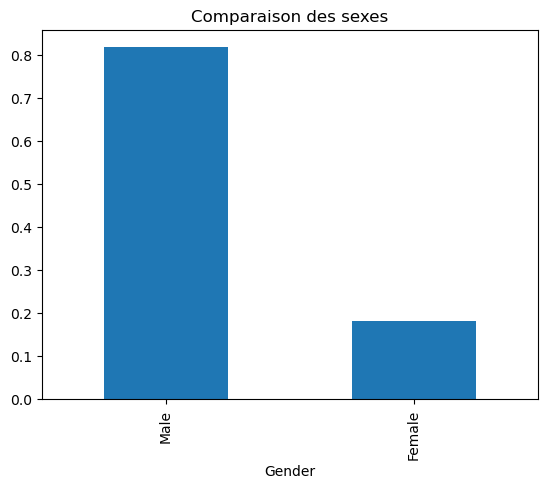

In [29]:
# faisons miantenant une visualisation au niveau des sexes

data_frame_credit['Gender'].value_counts(normalize=True).plot.bar(title='Comparaison des sexes')

In [ ]:
#il faut faire la meme chose pour toutes les autres variables categoriques Married etc...

In [22]:
#faisons le pour dependents
#on verra ke 58 pourcent ont 0 enfant
#16 ont 1 enfant
#16 ont 2 enfants
# 8 ont plus de 3 enfants

data_frame_credit['Dependents'].value_counts(normalize=True)*100

Dependents
0     58.631922
1     16.612378
2     16.449511
3+     8.306189
Name: proportion, dtype: float64

<Axes: title={'center': 'Nombre Enfants'}, xlabel='Dependents'>

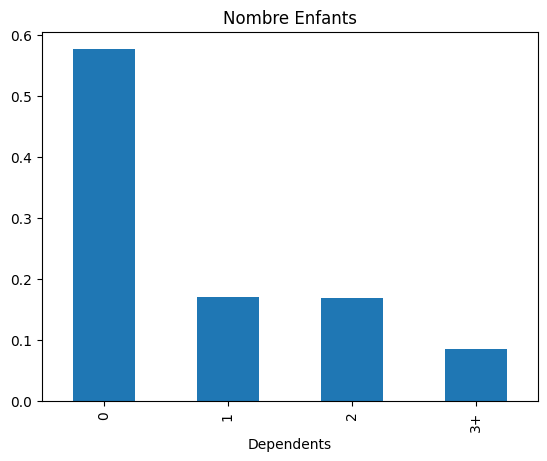

In [4]:
data_frame_credit['Dependents'].value_counts(normalize=True).plot.bar(title='Nombre Enfants')

In [5]:
print("Le nombre de doublons dans mon dataframe est " , data_frame_credit.duplicated().sum())

Le nombre de doublons dans mon dataframe est  0


In [23]:
#Les variables numeriques

#la a la 1ere colone on'a pas de valeurs manquantes
# la moyenne de ceux ki demande en ApplicantIncome est 5403.45 pour ceux ce loanAmount est de 145.75 etc...

# le salaire moyen de coapplicantincom est de 1621

# la moyenne de LoanAmount(Montant du credit) est 145 mil dollars et la valeur mediane est 128

#La methode describe() permettra kil m'affice plusieurs valeurs satisitsques

# le salaire minimun de la personne ki demande (ApplicantIncome) est de 81000 mil dollars
# le salaire maximal de la personne ki demande (ApplicantIncome) est de 150 mil dollars
# le salaire maximal du conjoint(CoapplicantIncome) de la personne ki demande (ApplicantIncome) est de 41667mil dollars
# le salaire minimal du conjoint(CoapplicantIncome) de la personne ki demande (ApplicantIncome) est de 0mil dollars


#il ya des valeurs aberantes mais on ne va pas les traiter dans ce probleme ci

data_frame_credit[variables_numeriques].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [ ]:
# essayon de visualiser les variables numeriques une par une

C:\Users\DAVID TANKEU\AppData\Local\Temp\ipykernel_4104\2988905251.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_frame_credit['ApplicantIncome'])


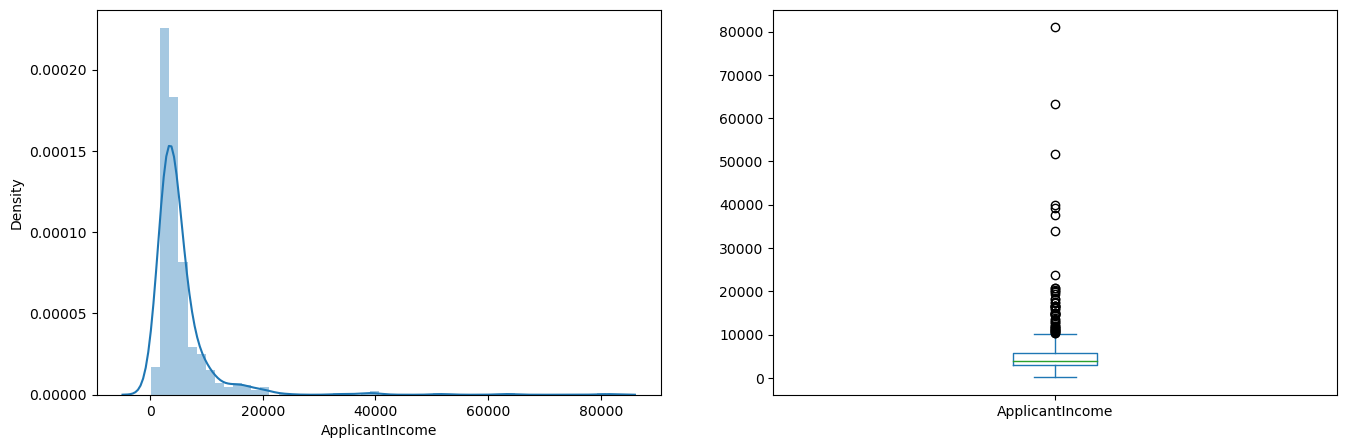

In [24]:
# on va faire deux digramme dans une figure un diagramme en moustache

#on'aura une figure une kon'a va diviser en deux sous figure subplot
#on va dessiner la premiere sous figure dans la position (121) et on va dessiner la deuxieme dans la position(122)

# dans la 1ere figure on mettra la distribution et dans la seconde on mettra les boxplot

# et dans la 2eme sous figure on dessinera e diagramme en moustache


plt.figure(1)  #ici je cree une figure


# 1ere sous figure

plt.subplot(121)
sns.distplot(data_frame_credit['ApplicantIncome'])

#2eme sous figure

plt.subplot(122)
data_frame_credit['ApplicantIncome'].plot.box(figsize=(16,5))
plt.suptitle('')
plt.show()


In [ ]:
# pour le diagramme en moustache on voit kil ya beaucoup de valeurs aberantes( les rond ki forment la pluie) et le salaire tourne autour de

#3000 mil dollars ki represente la mediane

In [ ]:
# faire la meme chose pour coApplicantIncomme

C:\Users\DAVID TANKEU\AppData\Local\Temp\ipykernel_4104\2515086813.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_frame_credit['CoapplicantIncome'])


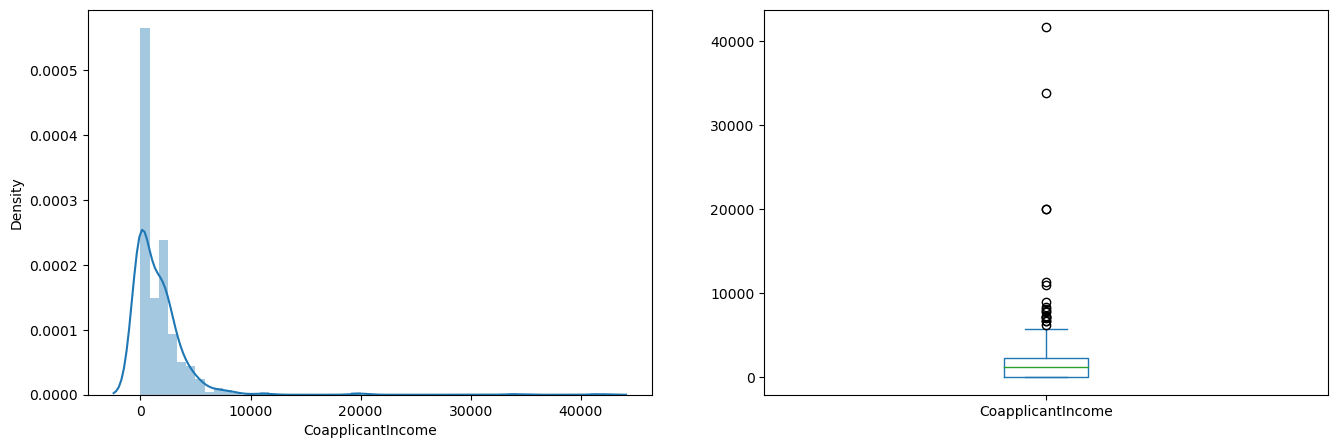

In [25]:
plt.figure(1)  #ici je cree une figure


# 1ere sous figure

plt.subplot(121)
sns.distplot(data_frame_credit['CoapplicantIncome'])

#2eme sous figure

plt.subplot(122)
data_frame_credit['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.suptitle('')
plt.show()

In [ ]:
#Faire la meme chose pour les autres variables numeriques

Analyse bivarrie

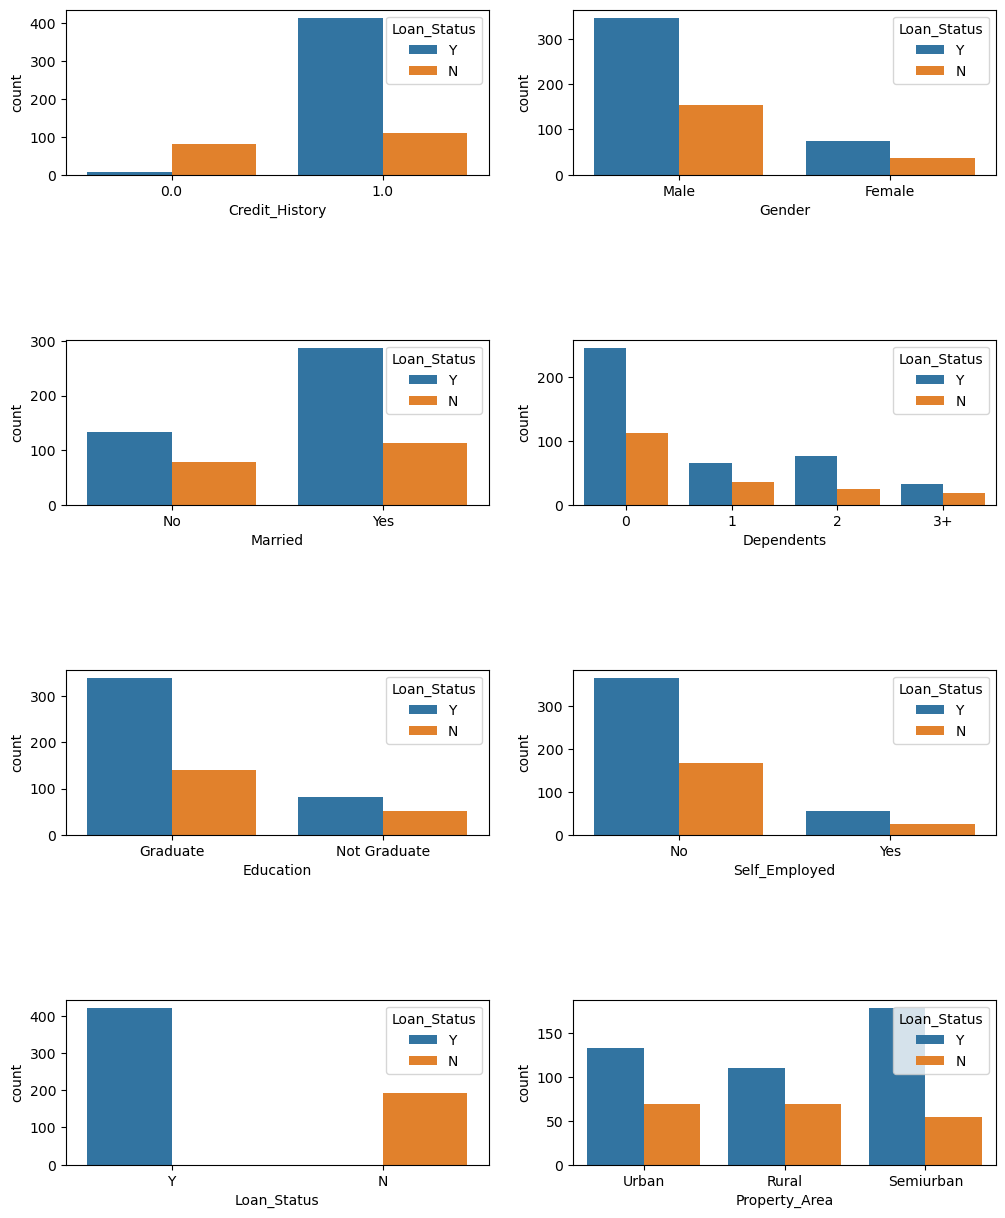

In [26]:
# pour l'analyse bivarrie je vais essayer de faire juste deux figures

# on'a 8 variables categories voila pkoi on'a divise en 4 colones et 2 lignes

# enumerate pour kil parcout le contenu de la position de la liste c'est un concept en python

fig,axes = plt.subplots(4,2, figsize=(12,15)) 

for idx,cat_col in enumerate(variables_categoriques):
    row,col = idx//2,idx%2
    sns.countplot(x = cat_col, data = data_frame_credit,hue='Loan_Status',ax = axes[row,col] )
plt.subplots_adjust(hspace=1)

In [ ]:
#on'est entrain d'etudier la relation entre chaque variable categorique et la variable load_status

#pour savoir peut etre si le sexe impact le status du credit ou pas
#ou bien essce que le mariage impact le statut du credit ou pas ainsi de suite pour les autres variables categoriques

In [40]:
for i, j in enumerate(variables_categoriques):
    print(i,j)

0 Credit_History
1 Gender
2 Married
3 Dependents
4 Education
5 Self_Employed
6 Loan_Status
7 Property_Area


Analyse bivarriees des variables Numeriques

pour le faire on peut faire une matrice de correlation ou ce kon appele la readmap
la readmap est un moyen pour avoir un visuel sur les valeurs numeriques

On va prendre les valeurs numeriques et on va les dessiner dans une readmap

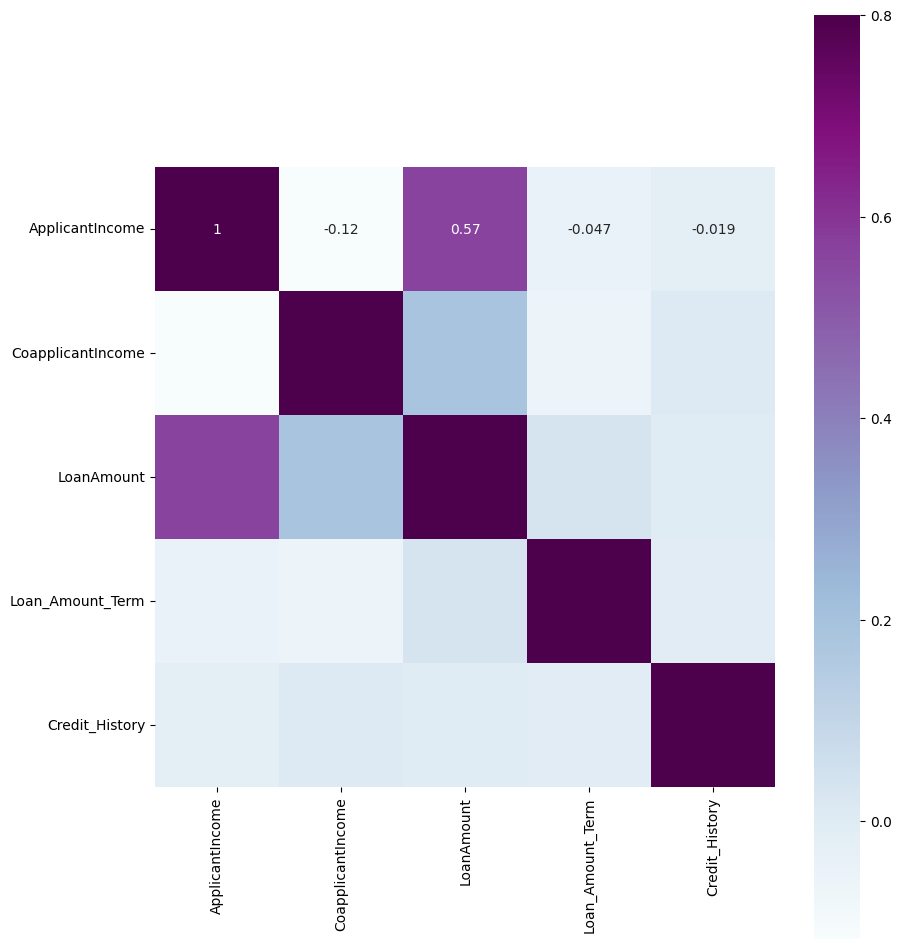

In [27]:
#matrice de colleration pour voir la relation entre nos differentes variables numeriques

# si deux variables sont tres correles entre elle ca ne sert a rien de garder les deux 
# la matrice de correlation permet de faire la selection de variable

#annot = True car on veut voir les valeurs numeriques dans notre heatmap

# Exclusion des colonnes non numériques
numerical_columns = data_frame_credit.select_dtypes(include=[float, int]).columns
data_frame_numeric = data_frame_credit[numerical_columns]

matrix = data_frame_numeric.corr()
f,ax=plt.subplots(figsize=(10, 12))
sns.heatmap(matrix , vmax = 0.8, square = True , cmap = 'BuPu' ,annot = True)
plt.show()

In [32]:
#matrice de correlation entre les differentes variables numeriques
data_frame_numeric.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


Preaprons notre base de donnes pour faire notre algortihmes de machine learning pour faire la prevision

ce programme se concentra sur le package sckilearn qui est un package dedie aux algorithmes de machine learning

Creation du Modele mais avant de le faire preparons d'abord notre base de donnee

on va disviser notre BD en deux une base de donnees variables categoriques et l'autre variables numeriques

In [28]:
df_cat = data_frame_credit[variables_categoriques]
df_cat

,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Loan_Status,Property_Area
0,1.0,Male,No,0,Graduate,No,Y,Urban
1,1.0,Male,Yes,1,Graduate,No,N,Rural
2,1.0,Male,Yes,0,Graduate,Yes,Y,Urban
3,1.0,Male,Yes,0,Not Graduate,No,Y,Urban
4,1.0,Male,No,0,Graduate,No,Y,Urban
...,...,...,...,...,...,...,...,...
609,1.0,Female,No,0,Graduate,No,Y,Rural
610,1.0,Male,Yes,3+,Graduate,No,Y,Rural
611,1.0,Male,Yes,1,Graduate,No,Y,Urban
612,1.0,Male,Yes,2,Graduate,No,Y,Urban


In [8]:
# toutes les chaines de caractere de cette BD remplacons les par les 0 et 1 pour pouvoir les utiliser dans notre modele

In [ ]:
# concatener veut dire mettre l'un a cote de l'autre

La methode dummies() a deux roles kan tu cree par exemple dans la colonne Gender comme on'a Male et Female il va creer genderMale et GenderFemale
lorke la persone est genderMale il va donner 1 pour genderFemale il va donner 0 mais la on'aura une redondance

drop_first = True car on doit supprimer la 1ere valeur

In [29]:

df_cat = pd.get_dummies(df_cat ,drop_first=True , dtype=int)
df_cat



,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Loan_Status_Y,Property_Area_Semiurban,Property_Area_Urban
0,1.0,1,0,0,0,0,0,0,1,0,1
1,1.0,1,1,1,0,0,0,0,0,0,0
2,1.0,1,1,0,0,0,0,1,1,0,1
3,1.0,1,1,0,0,0,1,0,1,0,1
4,1.0,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0,0,0,0,0,0,0,1,0,0
610,1.0,1,1,0,0,1,0,0,1,0,0
611,1.0,1,1,1,0,0,0,0,1,0,1
612,1.0,1,1,0,1,0,0,0,1,0,1


Concatenons maintenant cette base de donnes avec la partie numerique

In [31]:
df_num = data_frame_credit[variables_numeriques]
df_num

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,128.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [32]:
nouvelle_base_donnee_concatene = pd.concat([df_cat,df_num], axis=1)
nouvelle_base_donnee_concatene

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Loan_Status_Y,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1.0,1,0,0,0,0,0,0,1,0,1,5849,0.0,128.0,360.0,1.0
1,1.0,1,1,1,0,0,0,0,0,0,0,4583,1508.0,128.0,360.0,1.0
2,1.0,1,1,0,0,0,0,1,1,0,1,3000,0.0,66.0,360.0,1.0
3,1.0,1,1,0,0,0,1,0,1,0,1,2583,2358.0,120.0,360.0,1.0
4,1.0,1,0,0,0,0,0,0,1,0,1,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0,0,0,0,0,0,0,1,0,0,2900,0.0,71.0,360.0,1.0
610,1.0,1,1,0,0,1,0,0,1,0,0,4106,0.0,40.0,180.0,1.0
611,1.0,1,1,1,0,0,0,0,1,0,1,8072,240.0,253.0,360.0,1.0
612,1.0,1,1,0,1,0,0,0,1,0,1,7583,0.0,187.0,360.0,1.0


il faut mettre notre variable target a part et le reste on va le faire passer par notre algorithme de machine learning

In [34]:
y = nouvelle_base_donnee_concatene['Loan_Status_Y']
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status_Y, Length: 614, dtype: int32

on va creer maintenant une varaible X qui va contenir les features ou les caracteristiques

pour cela supprimons d'abord la colone Load_Status

In [35]:
X = nouvelle_base_donnee_concatene.drop('Loan_Status_Y',axis = 1)
X

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1.0,1,0,0,0,0,0,0,0,1,5849,0.0,128.0,360.0,1.0
1,1.0,1,1,1,0,0,0,0,0,0,4583,1508.0,128.0,360.0,1.0
2,1.0,1,1,0,0,0,0,1,0,1,3000,0.0,66.0,360.0,1.0
3,1.0,1,1,0,0,0,1,0,0,1,2583,2358.0,120.0,360.0,1.0
4,1.0,1,0,0,0,0,0,0,0,1,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0,0,0,0,0,0,0,0,0,2900,0.0,71.0,360.0,1.0
610,1.0,1,1,0,0,1,0,0,0,0,4106,0.0,40.0,180.0,1.0
611,1.0,1,1,1,0,0,0,0,0,1,8072,240.0,253.0,360.0,1.0
612,1.0,1,1,0,1,0,0,0,0,1,7583,0.0,187.0,360.0,1.0


Maintenant que nos donnes sont pretes on va importer ce quon va utiliser pour le modele

La variables de sortie est une variable categorique c'est Yes ou NO bon la on pense generalement a l'algorithme de regression logistique il y'a d'autres algorithmes
ici par exemple random Forest peut aussi etre adequant mais ici on va se concentrer sur un seul algortihmes qui est LogisticRegression


il faut diviser notre BD en deux une partie test qui prend 20 pourcent et une partie entrainement qui prend 80 pourcent

In [36]:
#random_state pour que ca se fasse d'une facon aleatoire
#Specifions la partie test et la partie train

# La fonction train_test_split permet de separer notre jeu de donne en deux grosses parties 
# notre algorithme va apprendre sur 80 pourcent de nos donnes et 20 pourcent de nos donnes pour le test et ce decoupage est aleatoire 

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 6)

Instacions maintenant le modele

In [37]:
#creons un classificateur clf
#Instacier le modele
clf = LogisticRegression()

#entrainer le modele
clf.fit(x_train,y_train)  # fit pour dire kon va l'appliquer sur xtrain et ytrain

LogisticRegression()

UTILISONS MAINTENANT CE MODELE POUR FAIRE DES PREVISIONS

In [38]:
#Testons le modele avec les variables tests
from sklearn.metrics import r2_score

pred = clf.predict(x_test)
print("Score : " , r2_score(y_test,pred))

# 17 pourcent de nos predictions ici sont bonnes

Score :  0.17171717171717182


In [43]:
pred  # les valeurs qu'on aura ici seront des valeurs calculees a base de notre modele la c'est toutes les valeurs predites par les donnes de test



array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Comparons le avec le y_test qui sont les bonnes valeurs de la base de donnee x_test c les valeurs predictes

y_test sont les bonnes valeurs extraites de la base de donnee

pour comparer donc les valeurs predites par notre model et les bonnes valeurs de la BD on va utliser accuracy_score

In [44]:
accuracy_score(y_test,pred)

# on verra que le modele est precis a 83 pourcent

0.8373983739837398

In [53]:
X.columns

Index(['Credit_History', 'Gender_Male', 'Married_Yes', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Not Graduate',
       'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

il ya d'autres techniques il y'a des colones qui ont un impact et d'autres ki n'en n'ont pas donc on
peut supprimer d'autres colones et voir comment evolue notre precision

il faut de meme normaliser la Base de donne la mettre entre 1 et 0 il y'a des focntions pour le faire ca va nous aider pour ameliorer notre accurrracy

In [54]:
# faisons nos propres previsions en utilisant notre modele cela permet de voir si on'a un nouveau client si on lui donnera un credit ou pas

#pour cela choississons un profil_test

# si en sortie on'a 1 ca veut dire que le credit sera accorde et 0 le credit ne sera pas accorde

profil_test = [[1,1,1,1,1,0,1,100,200,300,1,1,0,1,0.2]]
clf.predict(profil_test)

D:\MES FICHIERS\Logiciel installe\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
# On dois tester plein de modele de regression 

on va donc essayer d'implementer ce modele dans notre web application

Enregistrons le modele pour pouvoir l'utiliser dans notre application web

In [55]:
pickle.dump(clf,open('Prevision_credit_logement_bancaire.pkl', 'wb'))

ON va donc utiliser streamlit pour realiser notre application